# Relation between detections and percipitation as time evolution

Input:
- df_group
- ns_group
- ts
- cmap

In [1]:
import numpy as np
import pandas as pd
import obspy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
from datetime import datetime, timedelta
import time
from scipy import signal
from ComputeAttributes_CH_V1 import *
from DF_detections import *
from ILL_functions import *

In [2]:
# set plotting default parameters
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.figsize'] = (6.4, 4.8) # if wider plot, only change first value.
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Verdana']
#plt.rcParams['ytick.major.pad']= 2

cmcolors = plt.get_cmap('viridis').colors #magma or viridis
cmap = plt.get_cmap('viridis')
# Specify colors
colors = [cmcolors[20],cmcolors[120],cmcolors[180],cmcolors[200]]

In [69]:
# read df
year = 2017
file_ending = 'v4_bigsf_clf2_ILLx8_new'
plot_ending = 'v4_bigsf_clf2_ILLx8'
path_to_raw_data = '/media/manuela/Elements/illgraben/miniseed/'

class_res, dttimes, all_class, tslops, dslops = read_features(year, file_ending)
df_group_d, df_group, ns_dat, ns_group_d, ns_group = read_meteo(class_res, year)

ts,te = DF_detections(year)

In [70]:
class_mask, ns_dat_per, ns_dat_mask = mask_debrisflow(class_res, ns_dat, ts, te)
df_polar, df_polar_mask, ns_polar, ns_polar_mask = mask_polar(class_res, class_mask, ns_dat, ns_dat_per, ns_dat_mask)
group_all_DF, group_all, group_all5_DF, group_all5 = some_processing(class_res, class_mask, ns_dat_per, ns_dat_mask)

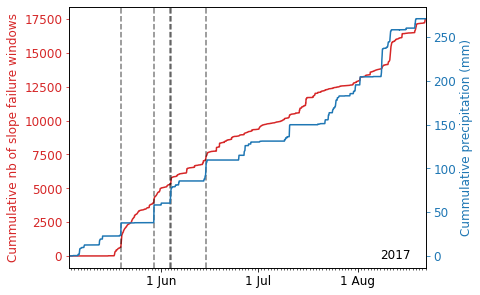

In [71]:
fig, ax1 = plt.subplots()
ax1.plot(np.cumsum(group_all_DF['classes']), color='C3')
ax1.set_ylabel('Cummulative nb of slope failure windows')
ax1.yaxis.label.set_color('C3')
ax1.tick_params(axis='y', labelcolor='C3', colors='C3')

ax2 = ax1.twinx()
ax2.plot(np.cumsum(group_all_DF['267']), color='C0')
ax2.set_ylabel('Cummulative precipitation (mm)')
ax2.yaxis.label.set_color('C0')
ax2.tick_params(axis='y', labelcolor='C0', colors='C0')

for ts_i in ts:
    ax1.axvline(datetime.strptime(ts_i,"%Y-%m-%dT%H:%M:%S"), color='k', linestyle='--', alpha=0.5)
    
h_int = 24*7
mdates.DayLocator(bymonthday=(1))
daterange = pd.date_range(group_all_DF.index[0], group_all_DF.index[-1], freq=str(h_int)+'h', normalize=True)

myFmt = mdates.DateFormatter('%-d %b') 
months = mdates.MonthLocator()  
days = mdates.DayLocator(bymonthday=(1))   
dayss = mdates.DayLocator()

ax1.xaxis.set_major_formatter(myFmt)
ax1.xaxis.set_major_locator(days)
ax1.xaxis.set_minor_locator(dayss)

ax1.set_xlim(group_all_DF.index[0], group_all_DF.index[-1])

fig.text(0.8,0.15, f'{year}')

plt.savefig(f'../plot/{year}/cumsum_{plot_ending}.png',bbox_inches='tight', dpi=300)

In [37]:
years = [2017, 2018, 2019, 2020, 2021]
df_final = pd.DataFrame()

file_ending = 'v4_bigsf_clf2_ILLx8_new'
plot_ending = 'v4_bigsf_clf2_ILLx8'

for year in years:
    class_res, dttimes, all_class, tslops, dslops = read_features(year, file_ending)
    df_group_d, df_group, ns_dat, ns_group_d, ns_group = read_meteo(class_res, year)

    ts,te = DF_detections(year)
    
    class_mask, ns_dat_per, ns_dat_mask = mask_debrisflow(class_res, ns_dat, ts, te)
    df_polar, df_polar_mask, ns_polar, ns_polar_mask = mask_polar(class_res, class_mask, ns_dat, ns_dat_per, ns_dat_mask)
    group_all_DF, group_all, group_all5_DF, group_all5 = some_processing(class_res, class_mask, ns_dat_per, ns_dat_mask)
    
    df_final = pd.concat([df_final,group_all_DF], axis=0)
    
print(df_final)
df_res = df_final.copy().resample('H').asfreq() # fill missing enteries with NaN
print(df_res)

/media/manuela/UNTITLED/illgraben/code/ILL_functions.py:80: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ns_dat_mask.loc[ns_dat_per[ns_mask].index, '267'] = 0


                     classes   266   261  267   274    269  283    306  580  \
Date                                                                          
2017-05-03 11:00:00        0  62.0   6.2  0.0  34.0  815.0  2.9  856.2  NaN   
2017-05-03 12:00:00        0  54.1   6.1  0.0   6.0  519.0  2.9  856.0  NaN   
2017-05-03 13:00:00        0  53.7   7.1  0.0  23.0  713.0  2.3  855.8  NaN   
2017-05-03 14:00:00        0  53.1   7.6  0.0  39.0  653.0  2.9  855.5  NaN   
2017-05-03 15:00:00        0  52.2   7.9  0.0  53.0  571.0  3.3  855.3  NaN   
...                      ...   ...   ...  ...   ...    ...  ...    ...  ...   
2021-09-16 20:00:00        0  93.8  11.7  0.0   0.0    1.0  1.9  859.8  NaN   
2021-09-16 21:00:00        0  95.6  11.7  0.1   0.0    1.0  1.6  859.8  NaN   
2021-09-16 22:00:00        0  95.1  11.6  0.1   0.0    1.0  1.6  859.8  NaN   
2021-09-16 23:00:00        0  97.9  11.5  0.0   0.0    1.0  2.0  859.7  NaN   
2021-09-17 00:00:00        0  98.5  11.4  0.0   0.0 

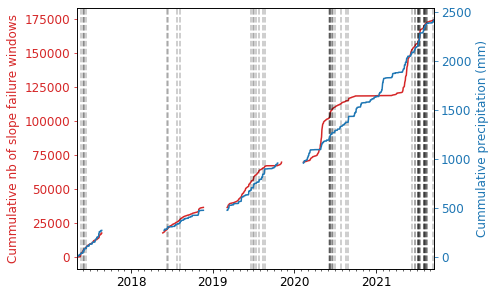

In [40]:
fig, ax1 = plt.subplots()
ax1.plot(np.cumsum(df_res['classes']), color='C3')
ax1.set_ylabel('Cummulative nb of slope failure windows')
ax1.yaxis.label.set_color('C3')
ax1.tick_params(axis='y', labelcolor='C3', colors='C3')

ax2 = ax1.twinx()
ax2.plot(np.cumsum(df_res['267']), color='C0')
ax2.set_ylabel('Cummulative precipitation (mm)')
ax2.yaxis.label.set_color('C0')
ax2.tick_params(axis='y', labelcolor='C0', colors='C0')

for year in years:
    ts,te = DF_detections(year)
    for ts_i in ts:
        ax1.axvline(datetime.strptime(ts_i,"%Y-%m-%dT%H:%M:%S"), color='k', linestyle='--', alpha=0.25)

myFmt = mdates.DateFormatter('%Y') # label
locator_years = mdates.YearLocator()
locator_months = mdates.MonthLocator()  

ax1.xaxis.set_major_formatter(myFmt) # label
ax1.xaxis.set_major_locator(locator_years)
ax1.xaxis.set_minor_locator(locator_months)

ax1.set_xlim(df_res.index[0], df_res.index[-1])

#plt.savefig(f'../plot/cumsum1_{plot_ending}.png',bbox_inches='tight', dpi=300)